<a href="https://colab.research.google.com/github/hhbb123/hoon/blob/master/condensed%20matter/f_0_BoseHubbardmodel_density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import pylab as plt


In [2]:
#parameter
q_init=1  #<b>=q
d=2
n_max=6

t_max=0.1
t_min=0
u_max=1.5
u_min=0

In [3]:
def Hamiltonian1(t,u,q):
  Hmf=np.zeros((6,6))
  for i in range(0,6):
      Hmf[i][i]=0.5*i*(i-1)-u*i
  for i in range(0,5):
      Hmf[i][i+1]=-t*math.sqrt(i+1)*q*4
      Hmf[i+1][i]=-t*math.sqrt(i+1)*q*4
  for i in range(1,5):
      Hmf[i][i-1]=-t*math.sqrt(i)*q*4
      Hmf[i-1][i]=-t*math.sqrt(i)*q*4

  return Hmf

n=np.zeros((n_max,n_max))
for i in range(0,n_max):
    n[i][i]=i

# b dagger=bt
bt=np.zeros((n_max,n_max))
for i in range(0,n_max):
    bt[i][i-1]=i**(0.5)
b=np.matrix.getH(bt)

def Hamiltonian2(t,u,q):
  H=-2*d*t*(bt*q+b*q)-u*n+0.5*n*(n-1)
  return H


In [4]:
T=[]
Q_1=[]
for t in np.arange(0,t_max,t_max/1000):
  q_1=1
  q_prev=100000000
  while abs(q_prev-q_1)>1e-4:
    D,V=np.linalg.eig(Hamiltonian1(t,0.5,q_1))
    w=V[:,np.argmin(D)]
    q_prev=q_1
    q_1=0
    for i in range(0,5):
      q_1 += ((i+1)**0.5)*np.conjugate(w[i])*w[i+1]
  Q_1.append(q_1)
  T.append(t)

In [5]:
Q_2=[]
for t in np.arange(0,t_max,t_max/1000):
  q_2=1
  q_prev=100000000
  #for k in range(0,20):
  while abs(q_prev-q_2)>1e-4:
    D,V=np.linalg.eig(Hamiltonian2(t,0.5,q_2))
    q_prev=q_2
    w=V[:,np.argmin(D)]

    q_2= np.dot(np.dot(w,b),np.matrix.getH(w))
  Q_2.append(q_2)

[0.0, 1.3823955836122202e-08, 1.1059058450790134e-07, 3.732372504151034e-07, 8.84690701200903e-07, 2.0734341035655083e-08, 4.299321617961731e-08, 7.964692679318612e-08, 1.358676177570946e-07, 2.1762180854607174e-07, 3.316698260619247e-07, 4.85565145899527e-07, 6.87653671335488e-07, 9.470729318509124e-07, 1.273751196115047e-06, 1.6784065248579866e-06, 2.1725457308279807e-06, 2.76846327239219e-06, 3.4792400645064873e-06, 4.318742221975169e-06, 2.5447774616201455e-07, 3.2474256890871143e-07, 4.0972859439870215e-07, 5.11633973004593e-07, 6.328647819724444e-07, 7.76044255814629e-07, 9.440219847921926e-07, 1.139883084311866e-06, 1.3669573291188403e-06, 1.6288282604908768e-06, 1.929342250826652e-06, 2.2726175362454694e-06, 2.6630532111277247e-06, 3.1053381838412315e-06, 3.604460092367946e-06, 4.165714178236724e-06, 4.794712118347568e-06, 5.497390810394374e-06, 6.280021118820976e-06, 7.149216566146535e-06, 8.111941983204764e-06, 9.175522104819144e-06, 1.0347650119577387e-05, 1.2008760839863925

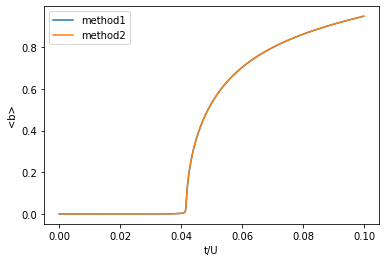

In [6]:
plt.plot(T,Q_1, label='method1')
plt.plot(T,Q_2, label='method2')
plt.legend()
plt.xlabel('t/U')
plt.ylabel('<b>')
print(Q_1)

In [17]:
U=[]
N_1=[]
for u in np.arange(u_min,u_max,u_max/1000):
  q_1=1
  q_prev=100000000
  while abs(q_prev-q_1)>1e-4:
    D,V=np.linalg.eig(Hamiltonian1(0.02,u,q_1))
    w=V[:,np.argmin(D)]
    q_prev=q_1
    q_1=0
    n_1=0
    for i in range(0,5):
      q_1 += ((i+1)**0.5)*np.conjugate(w[i])*w[i+1]
    for j in range(0,6):
      n_1 +=j*np.conjugate(w[j])*w[j]

  N_1.append(n_1)
  U.append(u)

In [18]:
N_2=[]
for u in np.arange(u_min,u_max,u_max/1000):
  q_2=1
  q_prev=100000000
  #for k in range(0,20):
  while abs(q_prev-q_2)>1e-4:
    D,V=np.linalg.eig(Hamiltonian2(0.02,u,q_2))
    q_prev=q_2
    w=V[:,np.argmin(D)]

    q_2= np.dot(np.dot(w,b),np.matrix.getH(w))
    n_2= np.dot(np.dot(w,n),np.matrix.getH(w))
  N_2.append(n_2)


[0.5234185671729822, 0.5321301342476662, 0.5408002567411346, 0.5494288673208719, 0.5580158965866241, 0.5665612715196902, 0.5750649137348737, 0.5835267374353915, 0.5919466469700763, 0.6003245338900485, 0.6086602733994918, 0.6169537200933561, 0.6252047028744409, 0.6334130189444375, 0.6415784267688505, 0.6497006379251248, 0.657800569950879, 0.6658416055285479, 0.6738398541574812, 0.6817950996727667, 0.6897070801702102, 0.6975754773950871, 0.7053999043024313, 0.7131798906393235, 0.72094690862146, 0.7286458000495193, 0.7363006615041828, 0.7439110299180518, 0.7514763324628294, 0.7589958627018121, 0.7665107016424836, 0.7739486738795515, 0.7813409824102586, 0.788686760227021, 0.7960268630275571, 0.8032894486667594, 0.8105050445750712, 0.817710919160215, 0.8248414368060866, 0.8319238507051634, 0.8389979858163643, 0.8459932834214815, 0.8529383070486614, 0.8598818046305186, 0.8667364696424594, 0.8735883022071241, 0.8803899367476651, 0.8871094071068607, 0.89381978503149, 0.9004815375176177, 0.9070

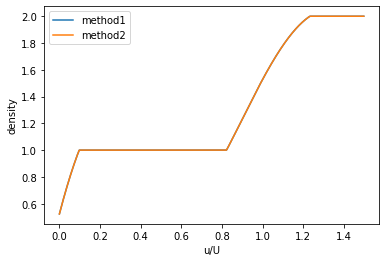

In [19]:
plt.plot(U,N_1,label='method1')
plt.plot(U,N_2,label='method2')
plt.legend()
plt.xlabel('u/U')
plt.ylabel('density')
print(N_1)